In [1]:
# !pip install gapminder

# 1. Load Data
#### Gapminder module didn't work, so I downloaded raw file from github.

In [2]:
import pandas as pd


url = 'https://raw.githubusercontent.com/resbaz/r-novice-gapminder-files/master/data/gapminder-FiveYearData.csv'
gapminder = pd.read_csv(url)
print(gapminder.head())

       country  year         pop continent  lifeExp   gdpPercap
0  Afghanistan  1952   8425333.0      Asia   28.801  779.445314
1  Afghanistan  1957   9240934.0      Asia   30.332  820.853030
2  Afghanistan  1962  10267083.0      Asia   31.997  853.100710
3  Afghanistan  1967  11537966.0      Asia   34.020  836.197138
4  Afghanistan  1972  13079460.0      Asia   36.088  739.981106


# 2. Data Merging

No need to convert or merge. The format is already as desired

# 3. Data Cleaning and Preparation 

In [3]:
# Check for null values
print(gapminder.isnull().sum())

# Rename columns 
gapminder.rename(columns={'pop': 'Population', 'gdpPercap': 'GDP_per_Capita', 'lifeExp': 'Life_Expectancy'}, inplace=True)

country      0
year         0
pop          0
continent    0
lifeExp      0
gdpPercap    0
dtype: int64


#### We see that there is no null value in the dataset

# 4. Data Exploration

In [4]:
# Display the first and last 5 rows
print(gapminder.head())
print(gapminder.tail())

       country  year  Population continent  Life_Expectancy  GDP_per_Capita
0  Afghanistan  1952   8425333.0      Asia           28.801      779.445314
1  Afghanistan  1957   9240934.0      Asia           30.332      820.853030
2  Afghanistan  1962  10267083.0      Asia           31.997      853.100710
3  Afghanistan  1967  11537966.0      Asia           34.020      836.197138
4  Afghanistan  1972  13079460.0      Asia           36.088      739.981106
       country  year  Population continent  Life_Expectancy  GDP_per_Capita
1699  Zimbabwe  1987   9216418.0    Africa           62.351      706.157306
1700  Zimbabwe  1992  10704340.0    Africa           60.377      693.420786
1701  Zimbabwe  1997  11404948.0    Africa           46.809      792.449960
1702  Zimbabwe  2002  11926563.0    Africa           39.989      672.038623
1703  Zimbabwe  2007  12311143.0    Africa           43.487      469.709298


In [5]:
# Identify the number of unique countries
unique_countries = gapminder['country'].nunique()
print("Number of unique countries: ",unique_countries)

Number of unique countries:  142


In [6]:
# Extract data for 1952 and create a new set
data_1952 = gapminder[gapminder['year'] == 1952]
print(data_1952.head())

        country  year  Population continent  Life_Expectancy  GDP_per_Capita
0   Afghanistan  1952   8425333.0      Asia           28.801      779.445314
12      Albania  1952   1282697.0    Europe           55.230     1601.056136
24      Algeria  1952   9279525.0    Africa           43.077     2449.008185
36       Angola  1952   4232095.0    Africa           30.015     3520.610273
48    Argentina  1952  17876956.0  Americas           62.485     5911.315053


# 5. Data Filtering

In [7]:
# Chosen continent = Asia
africa_data = gapminder[gapminder['continent'] == 'Asia']

# Filter countries with population < 1 million
large_pop_data = africa_data[africa_data['Population'] > 1_000_000]
print(large_pop_data.head())

       country  year  Population continent  Life_Expectancy  GDP_per_Capita
0  Afghanistan  1952   8425333.0      Asia           28.801      779.445314
1  Afghanistan  1957   9240934.0      Asia           30.332      820.853030
2  Afghanistan  1962  10267083.0      Asia           31.997      853.100710
3  Afghanistan  1967  11537966.0      Asia           34.020      836.197138
4  Afghanistan  1972  13079460.0      Asia           36.088      739.981106


# 6. Data Organization

In [8]:
sorted_data = gapminder.sort_values(by='Life_Expectancy', ascending=True)
print(sorted_data.head())


           country  year  Population continent  Life_Expectancy  \
1292        Rwanda  1992   7290203.0    Africa           23.599   
0      Afghanistan  1952   8425333.0      Asia           28.801   
552         Gambia  1952    284320.0    Africa           30.000   
36          Angola  1952   4232095.0    Africa           30.015   
1344  Sierra Leone  1952   2143249.0    Africa           30.331   

      GDP_per_Capita  
1292      737.068595  
0         779.445314  
552       485.230659  
36       3520.610273  
1344      879.787736  


### Here we define categorize function according to thresholds, then apply it on gapmider['Population'] to get the new column

In [9]:
def categorize(population):
    if population > 50_000_000:
        return 'High'
    elif population > 10_000_000:
        return 'Medium'
    else:
        return 'Low'

In [10]:
gapminder['Population_Category'] = gapminder['Population'].apply(categorize)
print(gapminder[['country', 'Population', 'Population_Category']].head())

       country  Population Population_Category
0  Afghanistan   8425333.0                 Low
1  Afghanistan   9240934.0                 Low
2  Afghanistan  10267083.0              Medium
3  Afghanistan  11537966.0              Medium
4  Afghanistan  13079460.0              Medium


# 7. Basic Data Analysis

#### I use groupby function to get grouped data, then print the mean of the gdp

In [11]:
grouped_data = gapminder.groupby('continent')
print(grouped_data['GDP_per_Capita'].mean())

continent
Africa       2193.754578
Americas     7136.110356
Asia         7902.150428
Europe      14469.475533
Oceania     18621.609223
Name: GDP_per_Capita, dtype: float64


#### Identify the country with the highest life expectancy in year 1952 using data_1952

In [12]:
highest = data_1952.loc[data_1952['Life_Expectancy'].idxmax()]
print(highest)

country                 Norway
year                      1952
Population           3327728.0
continent               Europe
Life_Expectancy          72.67
GDP_per_Capita     10095.42172
Name: 1140, dtype: object


# 8. Data Visualization

<Axes: title={'center': 'Life Expectancy in Norway Over the Years'}, xlabel='Year', ylabel='Life Expectancy'>

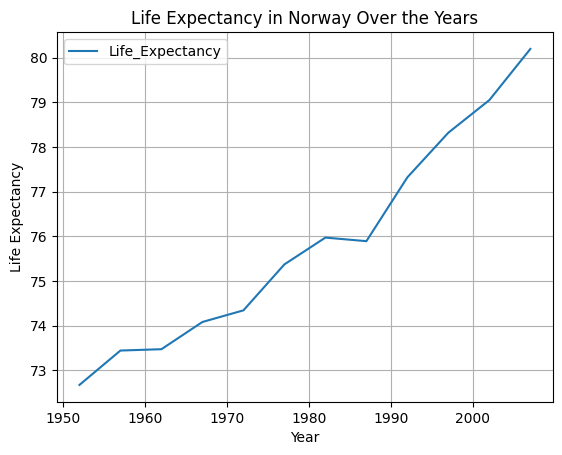

In [13]:
norway_data = gapminder[gapminder['country'] == 'Norway']

norway_data.plot(
    x='year',
    y='Life_Expectancy',
    title='Life Expectancy in Norway Over the Years',
    xlabel='Year',
    ylabel='Life Expectancy',
    grid=True               
)